In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('co2.csv')

In [3]:
df.head()

,YYYYMM,Value
0,197301,72.076
1,197302,64.442
2,197303,64.084
3,197304,60.842
4,197305,61.798


In [4]:
df.shape

(523, 2)

In [5]:
df.columns

Index(['YYYYMM', 'Value'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YYYYMM  523 non-null    int64  
 1   Value   523 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.3 KB


In [7]:
df.isnull().sum()

YYYYMM    0
Value     0
dtype: int64

In [8]:
df['year']=df['YYYYMM'].astype('str').apply(lambda x: x[:-2]).astype(int)
df['month']=df['YYYYMM'].astype('str').apply(lambda x: x[4:]).astype(int)

In [9]:
df.drop('YYYYMM',axis=1,inplace=True)

In [10]:
df.dtypes

Value    float64
year       int32
month      int32
dtype: object

In [11]:
print('min year:',df['year'].min())
print('max year:',df['year'].max())
print('number of unique years: ', len(df['year'].unique()))
print('unique years :', df['year'].unique())
print('*'*85)
print('min month:',df['month'].min())
print('max month:',df['month'].max())
print('number of unique months: ', len(df['month'].unique()))
print('unique months: ', df['month'].unique())

min year: 1973
max year: 2016
number of unique years:  44
unique years : [1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]
*************************************************************************************
min month: 1
max month: 12
number of unique months:  12
unique months:  [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [12]:
X=df[['month','year']].values
y=df['Value'].values

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(366, 2)
(157, 2)
(366,)
(157,)


In [15]:
xgb_model=xgb.XGBRegressor(learning_rate=0.08,
                            n_estimators=1000,
                            subsample=0.75,
                            colsample_bytree=1,
                            max_depth=7,
                            gamma=0)


In [16]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [17]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(xgb_model,X_train,y_train,cv=10)

In [18]:
print('mean scores:%.2f' % scores.mean())

mean scores:0.97


In [19]:
predictions=xgb_model.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error,r2_score


rmse=np.sqrt(mean_squared_error(y_test,predictions))
print('rmse: %.2f' % rmse)

rmse: 4.20


In [21]:
r2=np.sqrt(r2_score(y_test,predictions))
print('r2: %.2f' %(r2))

r2: 0.99


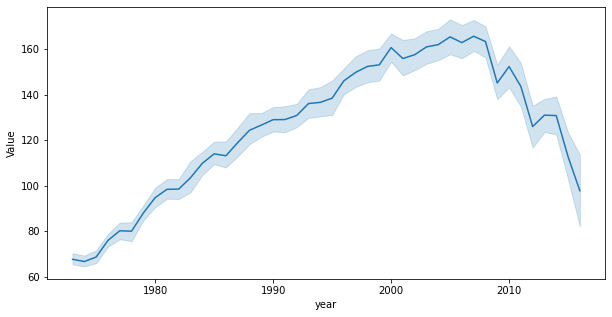

In [22]:
plt.figure(figsize=[10,5])
sns.lineplot(x='year',y='Value',data=df)
plt.show()

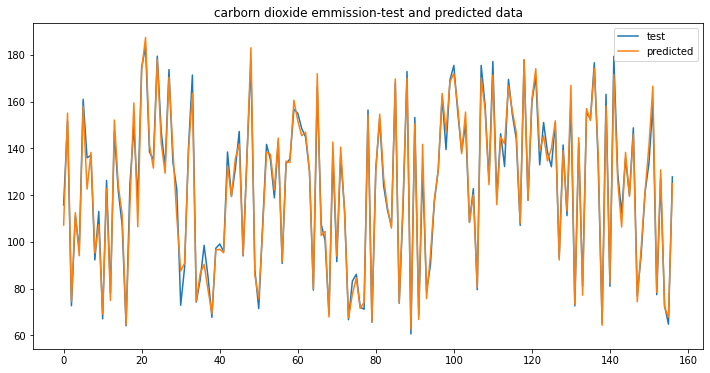

In [23]:
plt.figure(figsize=(12,6))
x_ax=range(len(y_test))
plt.plot(x_ax,y_test,label='test')
plt.plot(x_ax,predictions,label='predicted')
plt.title('carborn dioxide emmission-test and predicted data')
plt.legend()
plt.show()

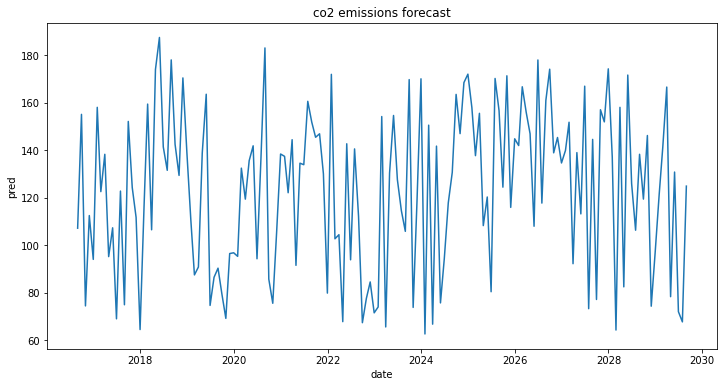

In [24]:
plt.figure(figsize=(12,6))
df=pd.DataFrame(predictions,columns=['pred'])
df['date']=pd.date_range(start='8/1/2016',periods=len(df),freq='M')
sns.lineplot(x='date',y='pred',data=df)
plt.title('co2 emissions forecast')
plt.show()

In [25]:
df


,pred,date
0,107.155907,2016-08-31
1,155.081146,2016-09-30
2,74.435890,2016-10-31
3,112.480606,2016-11-30
4,94.025795,2016-12-31
...,...,...
152,78.323685,2029-04-30
153,130.794739,2029-05-31
154,72.009773,2029-06-30
155,67.713402,2029-07-31
